# Sample run of Sentiment Analysis of Joker quotes.

<p>Prepared by: <a href = 'https://github.com/sagsshakya'>Sagun Shakya</a></p>
- GITAM Institute of Science.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import os
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming')

In [2]:
url = 'https://en.wikiquote.org/wiki/The_Dark_Knight_(film)'
page = requests.get(url)

In [3]:
soup = BS(page.text, 'html.parser')

In [4]:
#print(soup.prettify())

In [5]:
scripts = soup.find_all('ul')
joker = scripts[2].find_all('li')
joker

[<li>I believe that whatever doesn't kill you, simply makes you... <i><b>stranger</b></i>.</li>,
 <li>Do you wanna know how I got these scars?  My father was a drinker, and a fiend.  And one night, he goes off <i>crazier</i> than usual.  Mommy gets the kitchen knife to defend herself.  He doesn't like that.  <i>Not. One. Bit</i>. So, me watching, he takes the knife to her, laughing while he does it.  He turns to me, and he says, <b>"Why so serious?"</b>  He comes at me with the knife. <b>"Why so <i>SERIOUS?!</i>"</b>  He sticks the blade in my mouth—<b>"Let's put a <i>smile</i> on that <i>face</i>!"</b>  Aaaand... <b>Why so serious?</b></li>,
 <li>Don't talk like one of them! You're not - even if you'd like to be. To them, you're just a freak, like me. They need you right now, but when they don't, they'll cast you out - like a leper. See, their "morals", their "code"... it's a bad joke, dropped at the first sign of trouble.  They're only as good as the world allows them to be. I'll sho

In [6]:
joker_list = [ii.text for ii in joker]
print(len(joker_list))

5


In [7]:
for ii in joker_list:
    print(ii)
    print('--------------')
    print('\n')

I believe that whatever doesn't kill you, simply makes you... stranger.
--------------


Do you wanna know how I got these scars?  My father was a drinker, and a fiend.  And one night, he goes off crazier than usual.  Mommy gets the kitchen knife to defend herself.  He doesn't like that.  Not. One. Bit. So, me watching, he takes the knife to her, laughing while he does it.  He turns to me, and he says, "Why so serious?"  He comes at me with the knife. "Why so SERIOUS?!"  He sticks the blade in my mouth—"Let's put a smile on that face!"  Aaaand... Why so serious?
--------------


Don't talk like one of them! You're not - even if you'd like to be. To them, you're just a freak, like me. They need you right now, but when they don't, they'll cast you out - like a leper. See, their "morals", their "code"... it's a bad joke, dropped at the first sign of trouble.  They're only as good as the world allows them to be. I'll show you. When the chips are down, these, ah, "civilized people"? They'll

### Creating a dataframe.

In [8]:
jokerdf = pd.DataFrame({'quote': joker_list})
jokerdf

,quote
0,"I believe that whatever doesn't kill you, simp..."
1,Do you wanna know how I got these scars? My f...
2,Don't talk like one of them! You're not - even...
3,You know what I've noticed? Nobody panics when...
4,Do I really look like a guy with a plan? You k...


## Cleaning the text.
- This includes removing non - significant words like 'the', 'a', etc. and some punctuation marks. 
- Stemming: For the word 'loves' or 'loved', we will only choose 'love'.

<p>
To learn more about RegEx, <a href = 'https://github.com/sagsshakya/Pandas-Notes/blob/master/Regular%20Expressions/Regular_Expressions.ipynb'>CLICK HERE</a>
</p>

## Data Cleaning.
- Removing non-word characters.
- Converting all the words into lower case.
- Removing extra spaces.

In [9]:
import re
for ii in range(len(jokerdf['quote'])):
    jokerdf['quote'][ii] = re.sub('[^a-zA-Z]', ' ' , jokerdf['quote'][ii], flags = re.IGNORECASE)
    # We can use '\W' (non - alphanumeric character or non - word character) instead of '[^a-zA-Z]'.

    #Convert into LowerCase.
    jokerdf['quote'][ii] = jokerdf['quote'][ii].lower()
    
    # Removing extra spaces.
    jokerdf['quote'][ii] = jokerdf['quote'][ii].replace('    ',' ')
    jokerdf['quote'][ii] = jokerdf['quote'][ii].replace('   ',' ')
    jokerdf['quote'][ii] = jokerdf['quote'][ii].replace('  ',' ')
    
    print(jokerdf['quote'][ii])
    print('--------------')
    print('\n')

i believe that whatever doesn t kill you simply makes you stranger 
--------------


do you wanna know how i got these scars my father was a drinker and a fiend and one night he goes off crazier than usual mommy gets the kitchen knife to defend herself he doesn t like that not one bit so me watching he takes the knife to her laughing while he does it he turns to me and he says why so serious he comes at me with the knife why so serious he sticks the blade in my mouth let s put a smile on that face aaaand why so serious 
--------------


don t talk like one of them you re not even if you d like to be to them you re just a freak like me they need you right now but when they don t they ll cast you out like a leper see their morals their code it s a bad joke dropped at the first sign of trouble they re only as good as the world allows them to be i ll show you when the chips are down these ah civilized people they ll eat each other see i m not a monster i m just ahead of the curve 
--------

### Removing all the non - significant words.

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as PS

ps = PS()

In [11]:
corpus = []
for jj in range(jokerdf.shape[0]):

    # Splitting the string review using a whitespace.
    review = jokerdf['quote'][jj].split()
    
    # The list of stopwords in the English language can be viewed as:
    mystopper = set(stopwords.words('english'))
    
    # Stemming.
    review = [ps.stem(ii) for ii in review if not ii in mystopper]
    
    # Joing the list into a string.
    review = ' '.join(review)
    
    corpus.append(review)

In [12]:
corpus

['believ whatev kill simpli make stranger',
 'wanna know got scar father drinker fiend one night goe crazier usual mommi get kitchen knife defend like one bit watch take knife laugh turn say seriou come knife seriou stick blade mouth let put smile face aaaand seriou',
 'talk like one even like freak like need right cast like leper see moral code bad joke drop first sign troubl good world allow show chip ah civil peopl eat see monster ahead curv',
 'know notic nobodi panic thing go accord plan even plan horrifi tomorrow tell press like gang banger get shot truckload soldier blow nobodi panic part plan say one littl old mayor die well everyon lose mind introduc littl anarchi upset establish order everyth becom chao agent chao oh know thing chao fair',
 'realli look like guy plan know dog chase car know one caught know thing']

### Creating a dataframe.

In [13]:
df_corpus = pd.DataFrame({'stemmed':corpus})
df_corpus.head(10)

,stemmed
0,believ whatev kill simpli make stranger
1,wanna know got scar father drinker fiend one n...
2,talk like one even like freak like need right ...
3,know notic nobodi panic thing go accord plan e...
4,realli look like guy plan know dog chase car k...


## Creating the Bag of Words Model.
<dl>
    <dt><b>Tokenization:</b></dt>
    <dd>Taking all the unique words from all the tuples and creating a separate column for each.</dd>
</dl>

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

- class sklearn.feature_extraction.text.CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html'>Documentation</a>

In [15]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0],
       [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0,
        

In [16]:
X.shape

(5, 112)

#### There are 5 quotes set. And, there are 112 unique words in the bag of words model.

## Sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [18]:
from textblob import TextBlob as TB

In [28]:
def senti(mystr):
    return TB(mystr).sentiment

In [26]:
for ii in range(len(jokerdf.quote)):   
    print(TB(jokerdf.quote[ii]).sentiment, '\n')

Sentiment(polarity=0.0, subjectivity=0.35714285714285715) 

Sentiment(polarity=-0.18999999999999995, subjectivity=0.47000000000000003) 

Sentiment(polarity=0.05057319223985891, subjectivity=0.544400352733686) 

Sentiment(polarity=-0.12916666666666665, subjectivity=0.5333333333333333) 

Sentiment(polarity=0.2, subjectivity=0.2) 



In [34]:
pol_list = [TB(jokerdf.quote[ii]).sentiment.polarity for ii in range(len(jokerdf.quote))]
sub_list = [TB(jokerdf.quote[ii]).sentiment.subjectivity for ii in range(len(jokerdf.quote))]

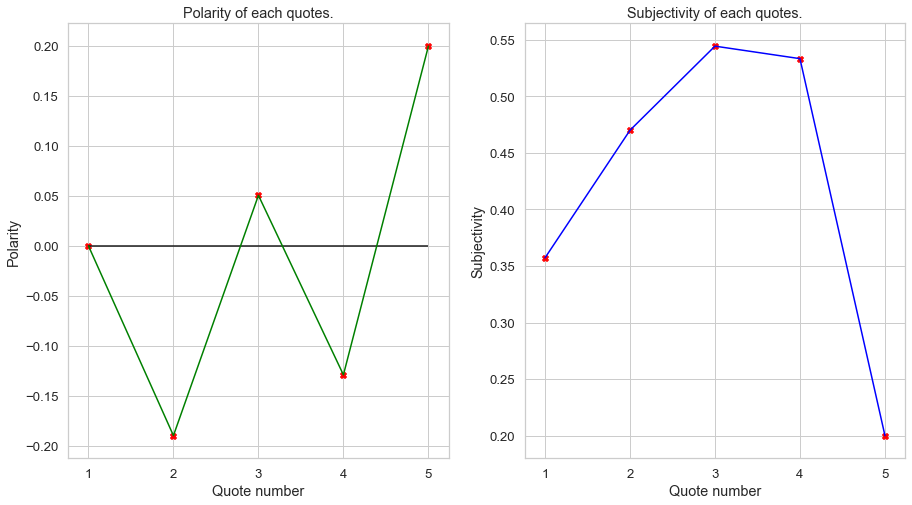

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize = (15,8))
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.subplot(1,2,1)
plt.plot(np.arange(1,len(jokerdf.quote)+1), pol_list, color = 'green')
plt.scatter(np.arange(1,len(jokerdf.quote)+1), pol_list, color = 'red', marker = 'X')
plt.hlines(0,1,len(jokerdf.quote))
plt.title('Polarity of each quotes.')
plt.xlabel('Quote number')
plt.ylabel('Polarity')
plt.xticks(np.arange(1,len(jokerdf.quote)+1))

plt.subplot(1,2,2)
plt.plot(np.arange(1,len(jokerdf.quote)+1), sub_list, color = 'blue')
plt.scatter(np.arange(1,len(jokerdf.quote)+1), sub_list, color = 'red', marker = 'X')
plt.title('Subjectivity of each quotes.')
plt.xlabel('Quote number')
plt.ylabel('Subjectivity')
plt.xticks(np.arange(1,len(jokerdf.quote)+1))

plt.show()

# The End.